In [27]:
import numpy as np
from matplotlib import pyplot as plt
from C2 import *
import typing


def plot_clusterization_homogen(dataset, u, ax: plt.Axes):
    ax.set_aspect('equal')
    ax.scatter(dataset[:, 0], dataset[:, 1], marker='.')
    ax.scatter(u[:, 0], u[:, 1], marker='x', c="red")


def plot_clusterization_multi(layered_dataset, u, new_u, ax: plt.Axes):
    ax.set_aspect('equal')
    for layer in layered_dataset:
        ax.scatter(layer[:, 0], layer[:, 1], marker=".")
    ax.set_prop_cycle(None)
    for uk in u:
        ax.scatter(uk[0], uk[1], marker="x", c='black')
    for uk in new_u:
        ax.scatter(uk[0], uk[1], marker="+", c='red')


def plot_k_history(K_history, ax: plt.Axes):
    shape = K_history[0].shape
    for i in range(len(K_history)):
        plate = np.zeros(shape)
        K_history[i] = np.vstack((K_history[i], plate))[:shape[0]]
    K_history_arr = np.array(K_history)
    K_history_delta = K_history_arr[1:] - K_history_arr[:-1]
    K_history_delta_magnitude = np.sqrt(np.sum(np.array(K_history_delta)**2, axis=2))
    for i in range(K_history_delta_magnitude.shape[-1]):
        ax.plot(K_history_delta_magnitude[:, i])
    ax.grid()


def plot_j_history(J_history, ax: plt.Axes):
    ax.plot(J_history, c="purple")
    ax.grid()
    ax.set_title(J_history[-1])
    ax.set_yscale('log')


CLUSTERS = 3

np.random.seed(12)

clusters = create_clusters(5, 100, CLUSTERS)
DATASET = clusters.reshape(-1, clusters.shape[-1])


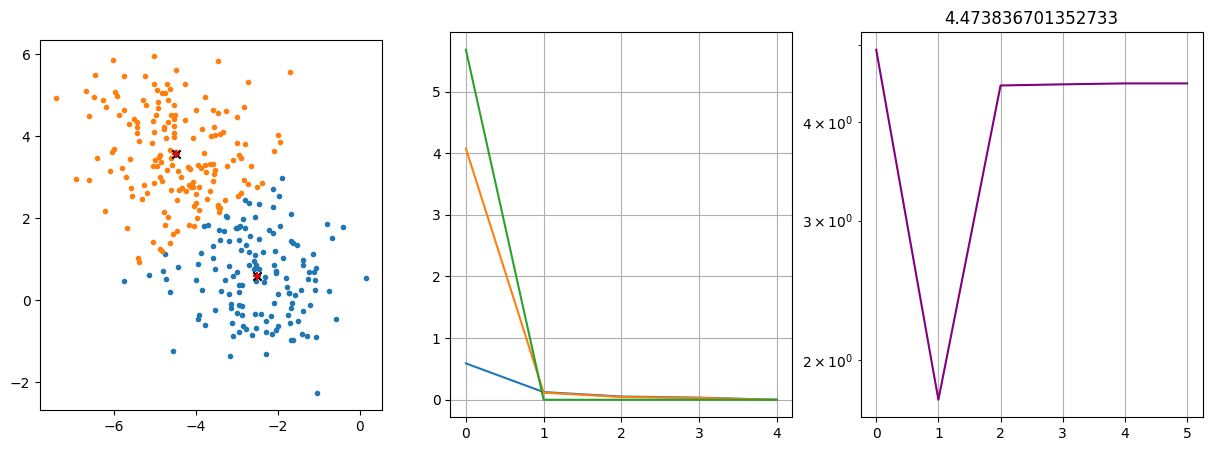

In [33]:
def create_and_fit(dataset: np.ndarray, clusters: int):
    np.random.seed()
    K = get_random_samples(dataset, clusters)
    K_history: list[np.ndarray] = [K]
    groups: list[np.ndarray] = split_into_clusters(dataset, K)
    J_history: list[typing.Any] = [cost_function(groups, K)]
    while True:
        groups = split_into_clusters(dataset, K)
        mids = mids_of_groups(groups)
        cost: typing.Any = cost_function(groups, mids)
        K_history.append(mids)
        J_history.append(cost)
        if mids.shape == K.shape and (mids == K).all():
            break
        K = mids
    return K_history, J_history, groups


def try_many_clusterizations(dataset: np.ndarray, clusters: int, amount: int) -> typing.Any:
    K_history = J_history = groups = []
    best_cost = -1
    for i in range(amount):
        result = create_and_fit(dataset, clusters)
        if i == 0 or result[1][-1] < best_cost:
            best_cost = result[1][-1]
            K_history, J_history, groups = result
    return K_history, J_history, groups


K_history, J_history, groups = try_many_clusterizations(DATASET, CLUSTERS, 100)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot_clusterization_multi(groups, K_history[-1], K_history[-1], axs[0])
plot_k_history(K_history, axs[1])
plot_j_history(J_history, axs[2])
plt.show()
